In [1]:
from keras.applications import VGG16
from keras.applications import imagenet_utils
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import load_img
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
import numpy as np
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import os
import cv2
import pickle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
model = VGG16(include_top=False,input_shape=(48,144,3),pooling=None)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 144, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 144, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 144, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 72, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 72, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 72, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 36, 128)       0     

In [4]:
for l in model.layers:
    l.trainable=False

In [5]:
a = Flatten()(model.output)
a = Dense(256, activation='relu')(a)
a = Dropout(0.5)(a)
a = Dense(128, activation='relu')(a)


out1 = Dense(32, activation="softmax", name="out1")(a)
out2 = Dense(32, activation="softmax", name="out2")(a)
out3 = Dense(32, activation="softmax", name="out3")(a)
out4 = Dense(32, activation="softmax", name="out4")(a)


model2 = Model(model.input,outputs=[out1, out2, out3, out4])
model2.compile(
    optimizer='adam',
    loss={
        "out1": "categorical_crossentropy",
        "out2": "categorical_crossentropy",
        "out3": "categorical_crossentropy",
        "out4": "categorical_crossentropy"
    },
    metrics={
        "out1": ["accuracy"],
        "out2": ["accuracy"],
        "out3": ["accuracy"],
        "out4": ["accuracy"]
    }
)




In [6]:
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 144, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 block1_conv1 (Conv2D)          (None, 48, 144, 64)  1792        ['input_1[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 48, 144, 64)  36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 24, 72, 64)   0           ['block1_conv2[0][0]']       

In [7]:
with open('encoder.bin','rb')as f:
    encoder = pickle.load(f)

In [8]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [9]:
# def datagenerator(path, batch_size=100):
#     pattern= os.path.join(path,'*.png')
#     fills= glob(pattern)
#     while True:
#         offset=0
#         while offset<len(fills):
#             items = fills[offset:offset+batch_size]
#             offset+=batch_size
#             x = []
#             y1 = []
#             y2 = []
#             y3 = []
#             y4 = []
#             for f in items:
#                 char = list(os.path.splitext(os.path.basename(f))[0])
#                 if len(char)!=4:
#                     continue
#                 im = cv2.imread(f)
#                 im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
#                 im = cv2.resize(im,(144,48)).astype(np.float32)
#                 im = imagenet_utils.preprocess_input(im)
#                 x.append(im)
#                 char = [to_categorical(encoder.transform([i]),num_classes=len(encoder.classes_)).reshape(-1) for i in char]
#                 y1.append(char[0])
#                 y2.append(char[1])
#                 y3.append(char[2])
#                 y4.append(char[3])
#             X = np.array(x,ndmin=4)
#             Y1 = np.array(y1)
#             Y2 = np.array(y2)
#             Y3 = np.array(y3)
#             Y4 = np.array(y4)
#             yield X,(Y1,Y2,Y3,Y4)

In [10]:
# data = datagenerator('train')
# for x,y in data:
#     print(len(x),len(y))
#     # print(x.shape,y.shape)

In [11]:
# # تعریف output_signature برای ۴ خروجی
# num_classes = len(encoder.classes_)
# output_signature = (
#     tf.TensorSpec(shape=(None, 48, 144, 3), dtype=tf.float32),  # ورودی تصویر
#     (
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y1
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y2
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y3
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)   # Y4
#     )
# )


# def create_dataset(path, batch_size=100):
#     def gen():
#         return datagenerator(path, batch_size)

#     dataset = tf.data.Dataset.from_generator(
#         gen,
#         output_signature=output_signature
#     )
#     return dataset



In [12]:
# train_dir = 'train'
# val_dir   = 'test'

# batch_size = 100
# steps_per_epoch  = max(1, len(glob(train_dir+'/*.png')) // batch_size)
# val_steps        = max(1, len(glob(val_dir  +'/*.png')) // batch_size)

# # h = model2.fit(
# #     datagenerator(train_dir, batch_size=batch_size),
# #     steps_per_epoch=steps_per_epoch,
# #     epochs=40
# # )



# train_dataset = create_dataset(train_dir, batch_size)
# val_dataset = create_dataset(val_dir, batch_size)

# h = model2.fit(
#     train_dataset,
#     steps_per_epoch=steps_per_epoch,
#     epochs=50,
#     validation_data=val_dataset,
#     validation_steps=val_steps
# )

In [13]:
def load_data(p):
    pattern = os.path.join(p,'*.png')
    files = glob(pattern)
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for f in files:
        char = list(os.path.splitext(os.path.basename(f))[0])
        if len(char)!=4:
            continue
        im = cv2.imread(f)
        # im = img_to_array(im)
        im = cv2.resize(im,(144,48))
        im = imagenet_utils.preprocess_input(im)
        
        x.append(im)
        char = [to_categorical(encoder.transform([i])[0], num_classes=len(encoder.classes_)) for i in char]

        y1.append(char[0])
        y2.append(char[1])
        y3.append(char[2])
        y4.append(char[3])
    X = np.array(x,ndmin=4)
    Y1 = np.array(y1)
    Y2 = np.array(y2)
    Y3 = np.array(y3)
    Y4 = np.array(y4)
    return X,Y1,Y2,Y3,Y4

x_train,Y1,Y2,Y3,Y4 = load_data('../2_1_Convolutional/train/')
h = model2.fit(x_train, {"out1": Y1, "out2": Y2, "out3": Y3, "out4": Y4}, epochs=20)



Epoch 1/20
308/308 [==============================] - 41s 112ms/step - loss: 13.6867 - out1_loss: 3.1859 - out2_loss: 3.5498 - out3_loss: 3.5356 - out4_loss: 3.4154 - out1_accuracy: 0.1558 - out2_accuracy: 0.0594 - out3_accuracy: 0.0664 - out4_accuracy: 0.0952
Epoch 2/20
308/308 [==============================] - 29s 93ms/step - loss: 11.2046 - out1_loss: 2.0770 - out2_loss: 3.2391 - out3_loss: 3.1453 - out4_loss: 2.7433 - out1_accuracy: 0.3843 - out2_accuracy: 0.1106 - out3_accuracy: 0.1288 - out4_accuracy: 0.2281
Epoch 3/20
308/308 [==============================] - 31s 100ms/step - loss: 9.8327 - out1_loss: 1.6278 - out2_loss: 2.9990 - out3_loss: 2.9066 - out4_loss: 2.2993 - out1_accuracy: 0.4806 - out2_accuracy: 0.1591 - out3_accuracy: 0.1855 - out4_accuracy: 0.3177
Epoch 4/20
308/308 [==============================] - 28s 91ms/step - loss: 9.0431 - out1_loss: 1.4104 - out2_loss: 2.8222 - out3_loss: 2.7401 - out4_loss: 2.0704 - out1_accuracy: 0.5424 - out2_accuracy: 0.1888 - out3_a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


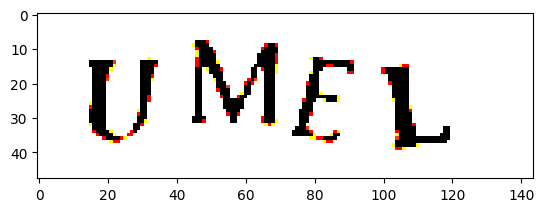

In [21]:
f = ('../2_1_Convolutional/test/UMEL.png')
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(144,48))
f = imagenet_utils.preprocess_input(im)
# f = cv2.resize(f,(144,48))
# f.shape
plt.imshow(f)


In [22]:
p = model2.predict(f.reshape(1,48,144,3))


1/1 [==============================] - 0s 106ms/step


In [23]:
for i in p:
    # print(np.argmax(i))
    print(encoder.inverse_transform([np.argmax(i)]))

['U']
['M']
['H']
['L']


In [17]:
model2.save('model2.keras')